# Cargo librerías

In [1]:
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import expon
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
# Rutas y carpetas
base_path = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica2\Parte_6\Costas,Forest and Higway'
folders = ['coast', 'forest', 'highway']

# Inicialización de variables
files_names = []
files_labels = []

# Obtener la lista de archivos en cada carpeta
for folder in folders:
    dirname = os.path.join(base_path, folder)
    files = [f for f in os.listdir(dirname) if f.endswith('.jpg')]
    print(f'Total de archivos en carpeta {folder}: {len(files)}')
    for file in files:
        files_names.append(os.path.join(dirname, file))
        files_labels.append(folder)

cant = len(files_names)
print('Total de archivos leídos: ', cant)


Total de archivos en carpeta coast: 360
Total de archivos en carpeta forest: 328
Total de archivos en carpeta highway: 270
Total de archivos leídos:  958


# Preparación de datos

In [3]:
# Inicialización de listas para almacenar características y etiquetas
features = []
labels = []

for i in range(cant):
    img = cv.imread(files_names[i])
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Calcular medias y varianzas por canal
    avgR = img[:, :, 0].mean()
    avgG = img[:, :, 1].mean()
    avgB = img[:, :, 2].mean()

    varR = img[:, :, 0].std()
    varG = img[:, :, 1].std()
    varB = img[:, :, 2].std()

    # Concatenar las medias y varianzas en una sola lista
    features_img = [avgR, avgG, avgB, varR, varG, varB]

    # Agregar las características a la lista de features
    features.append(features_img)

    # Agregar la etiqueta correspondiente a la lista de labels
    if 'coast' in files_labels[i]:
        labels.append(0)  # coast -> 0
    elif 'forest' in files_labels[i]:
        labels.append(1)  # forest -> 1
    elif 'highway' in files_labels[i]:
        labels.append(2)  # highway -> 2

# Convertir las características y etiquetas en arrays numpy
features = np.array(features)
labels = np.array(labels).reshape(-1, 1)  # Asegurarse de que las etiquetas sean una columna

# Combinar características y etiquetas
data = np.hstack((features, labels))
data[0:10]

array([[105.68328857, 112.07588196, 130.52000427,  73.1442869 ,
         70.79268452,  77.70802551,   0.        ],
       [ 99.96031189, 123.47872925, 162.06993103,  28.53206444,
         32.28624548,  49.90710494,   0.        ],
       [104.2310791 , 109.08465576, 123.27412415,  52.68361483,
         43.13502069,  60.16278987,   0.        ],
       [207.02923584, 207.34645081, 214.18225098,  34.09886918,
         32.11948614,  39.27421439,   0.        ],
       [ 95.28392029, 168.7283783 , 165.00054932,  63.97600727,
         60.35718773,  68.68109939,   0.        ],
       [130.94949341, 160.63999939, 133.13427734,  76.3399031 ,
         67.60319052,  61.91422323,   0.        ],
       [143.36387634, 157.76795959, 170.36830139,  59.96473874,
         56.45082482,  67.78272893,   0.        ],
       [ 96.85630798, 124.57978821, 153.06269836,  86.9808088 ,
         70.52304575,  64.30070583,   0.        ],
       [ 74.51193237, 111.21646118, 126.72618103,  38.27131421,
         48.8065

# Guardado de datos en un archivo .txt

In [4]:
# Crear los nombres de las columnas
columns = ['avgR', 'avgG', 'avgB', 'varR', 'varG', 'varB', 'label']

# Guardar los datos en un archivo .txt usando np.savetxt
filename = 'Base_de_Datos_Tar.txt'

# Guardar los datos en un archivo de texto con diferentes formatos para características y etiquetas
header = ','.join(columns)
formats = '%.6e %.6e %.6e %.6e %.6e %.6e %d'  # Usar %d para la etiqueta
np.savetxt(filename, data, delimiter=',', header=header, comments='', fmt=formats.split())

print(f"Archivo '{filename}' guardado exitosamente.")



Archivo 'Base_de_Datos_Tar.txt' guardado exitosamente.


# División del conjunto de datos en entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=1000)

# 1. Redes Neuronales

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(32,16,8,8,4), max_iter=1000, alpha=1e-4, learning_rate_init=0.010, activation='tanh', solver='adam', random_state=42)
mlp.fit(X_train, y_train.ravel())  # Aplanar y_train para evitar advertencias
y_pred_mlp = mlp.predict(X_test)
[y_pred_mlp, y_test.T]

[array([1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1,
        2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2,
        0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0,
        2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0,
        2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0,
        1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1,
        1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluación del modelo

In [7]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')

# Mostrar los resultados
print("MLP Classifier:")
print("Exactitud (Accuracy): ", accuracy_mlp)
print("F1 Score: ", f1_mlp)
print("Recall: ", recall_mlp)
print("Precisión: ", precision_mlp)

MLP Classifier:
Exactitud (Accuracy):  0.8020833333333334
F1 Score:  0.7966983711080164
Recall:  0.8020833333333334
Precisión:  0.8067497895622897


### Mostrar matriz de confusión

[[93 10  4]
 [ 6 93  5]
 [25  7 45]]


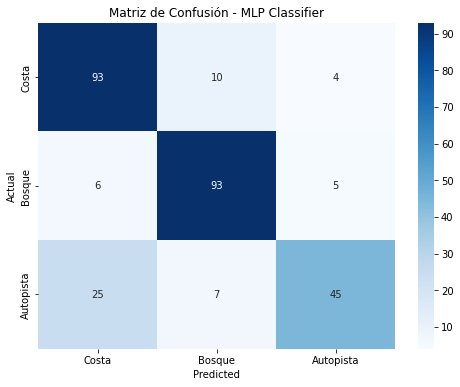

In [8]:
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Costa', 'Bosque', 'Autopista'], yticklabels=['Costa', 'Bosque', 'Autopista'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - MLP Classifier')
plt.show()

# 2. SVM con kernel RBF

In [9]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVM
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Definir los parámetros de búsqueda con distribución exponencial para `C` y `gamma`
param_distributions = {
    'C': expon(scale=100),
    'gamma': expon(scale=1)
}

# Aplicar RandomizedSearchCV
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train.ravel())  # Aplanar y_train para evitar advertencias

# Mejor modelo encontrado
best_svm = random_search.best_estimator_

# Realizar predicciones
y_pred = best_svm.predict(X_test_scaled)
[y_pred,y_test.T]

[array([1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2,
        0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0,
        2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2,
        2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0,
        1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1,
        1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1,
        0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0,
        2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluar el modelo SVM con RBF

In [10]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Imprimir las métricas de evaluación
print('SVM con RBF:')
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print(f"Exactitud (Accuracy): {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precisión: {precision}")

SVM con RBF:
Mejores hiperparámetros encontrados:
{'C': 33.52496763810817, 'gamma': 0.03758447776552253}
Exactitud (Accuracy): 0.8229166666666666
F1 Score: 0.8225418141220088
Recall: 0.8229166666666666
Precisión: 0.8265917126804223


### Calcular la matriz de confusión y Graficarla

Matriz de confusión:
[[81 14 12]
 [ 4 92  8]
 [ 8  5 64]]


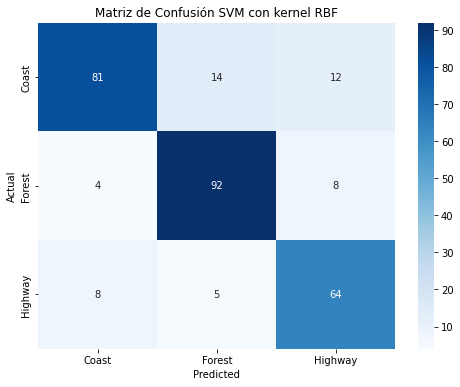

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Coast', 'Forest', 'Highway'], yticklabels=['Coast', 'Forest', 'Highway'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión SVM con kernel RBF")
plt.show()

# 3. Crear el modelo Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train.ravel())

# Realizar predicciones
y_pred_rf = rf.predict(X_test)

[y_pred_rf,y_test.T]

[array([1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
        2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2,
        0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0,
        2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0,
        2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
        1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0,
        1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0,
        2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluar el modelo Random Forest

In [13]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

# Imprimir las métricas de evaluación
print('Random Forest:')
print("Exactitud (Accuracy) - Random Forest:", accuracy_rf)
print("F1 Score - Random Forest:", f1_rf)
print("Recall - Random Forest:", recall_rf)
print("Precisión - Random Forest:", precision_rf)

Random Forest:
Exactitud (Accuracy) - Random Forest: 0.8090277777777778
F1 Score - Random Forest: 0.8081211498533598
Recall - Random Forest: 0.8090277777777778
Precisión - Random Forest: 0.8159788090936465


### Calcular la matriz de confusión

[[79 20  8]
 [ 3 94  7]
 [ 8  9 60]]


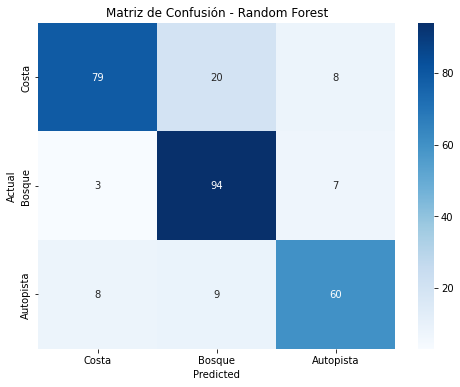

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir la matriz de confusión
print(cm_rf)

# Mostrar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Costa', 'Bosque', 'Autopista'], yticklabels=['Costa', 'Bosque', 'Autopista'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# 4. Crear el modelo Gradient Boosting

In [15]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
gb.fit(X_train, y_train.ravel())

# Realizar predicciones
y_pred_gb = gb.predict(X_test)

[y_pred_gb,y_test.T]


[array([1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
        2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2,
        0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0,
        2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0,
        2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
        1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0,
        1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2,
        0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0,
        2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluar el modelo

In [16]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')

# Imprimir las métricas de evaluación
print('Gradient Boosting')
print("Exactitud (Accuracy) - Gradient Boosting:", accuracy_gb)
print("F1 Score - Gradient Boosting:", f1_gb)
print("Recall - Gradient Boosting:", recall_gb)
print("Precisión - Gradient Boosting:", precision_gb)

Gradient Boosting
Exactitud (Accuracy) - Gradient Boosting: 0.8263888888888888
F1 Score - Gradient Boosting: 0.8252876831332059
Recall - Gradient Boosting: 0.8263888888888888
Precisión - Gradient Boosting: 0.8270819014841057


### Calcular la matriz de confusión y graficarla

[[81 15 11]
 [ 5 94  5]
 [10  4 63]]


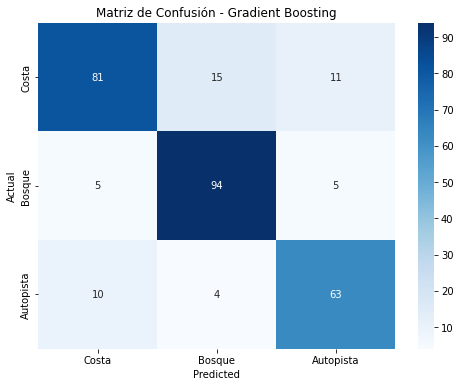

In [17]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Imprimir la matriz de confusión
print(cm_gb)

# Mostrar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Costa', 'Bosque', 'Autopista'], yticklabels=['Costa', 'Bosque', 'Autopista'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()

# 5. Crear el modelo K-Nearest Neighbors

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train.ravel())

# Realizar predicciones
y_pred_knn = knn.predict(X_test)

[y_pred_knn,y_test.T]

[array([1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
        2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2,
        0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0,
        2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
        1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1,
        1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0,
        2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluar el modelo

In [19]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

# Imprimir las métricas de evaluación
print('K-Nearest Neighbors')
print("Exactitud (Accuracy) - KNN:", accuracy_knn)
print("F1 Score - KNN:", f1_knn)
print("Recall - KNN:", recall_knn)
print("Precisión - KNN:", precision_knn)

K-Nearest Neighbors
Exactitud (Accuracy) - KNN: 0.7777777777777778
F1 Score - KNN: 0.7764410009286734
Recall - KNN: 0.7777777777777778
Precisión - KNN: 0.7823185956578667


### Calcular la matriz de confusión y graficarla

[[74 18 15]
 [ 7 90  7]
 [ 8  9 60]]


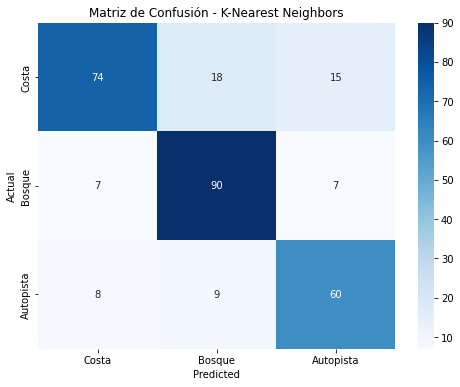

In [20]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Mostrar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Costa', 'Bosque', 'Autopista'], yticklabels=['Costa', 'Bosque', 'Autopista'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.show()

# 6. Crear el modelo de Regresión Logística

In [21]:
lr = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
lr.fit(X_train, y_train.ravel())

# Realizar predicciones
y_pred_lr = lr.predict(X_test)
[y_pred_lr,y_test.T]

[array([1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1,
        2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2,
        0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0,
        2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2,
        2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0,
        1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2,
        1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1,
        0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0,
        2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1,
        1, 2]),
 array([[1, 2, 1, 1, 1

### Evaluar el modelo

In [22]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

# Imprimir las métricas de evaluación
print('Regresión Logistica:')
print("Exactitud (Accuracy):", accuracy_lr)
print("F1 Score:", f1_lr)
print("Recall:", recall_lr)
print("Precisión:", precision_lr)

Regresión Logistica:
Exactitud (Accuracy): 0.7743055555555556
F1 Score: 0.7732545923400315
Recall: 0.7743055555555556
Precisión: 0.7735739071445822


### Calcular la matriz de confusión y graficarla

[[76 17 14]
 [ 6 90  8]
 [17  3 57]]


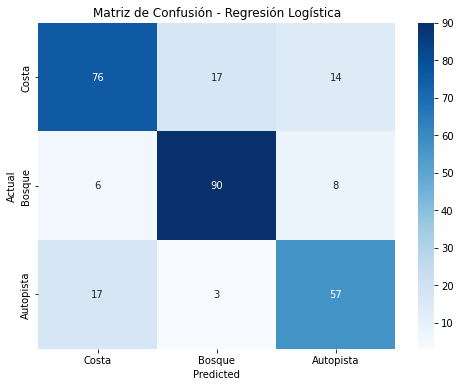

In [23]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Mostrar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Costa', 'Bosque', 'Autopista'], yticklabels=['Costa', 'Bosque', 'Autopista'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

Procesando imagen: coast_art1130.jpg


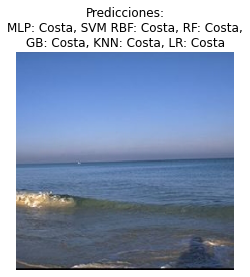

Procesando imagen: coast_bea1.jpg


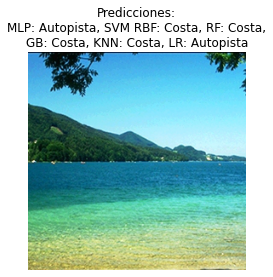

Procesando imagen: coast_land954.jpg


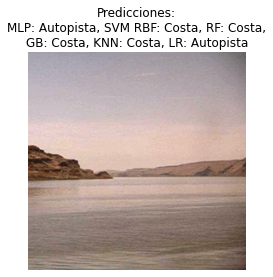

Procesando imagen: coast_n18001.jpg


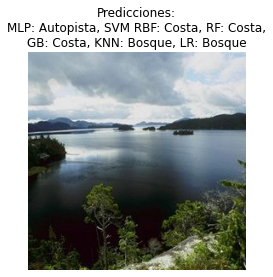

Procesando imagen: coast_n203015.jpg


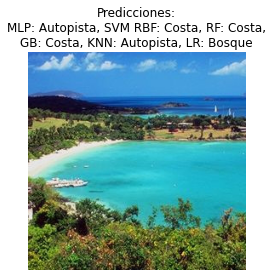

Procesando imagen: coast_n203030.jpg


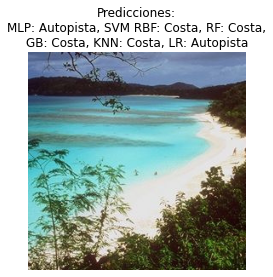

Procesando imagen: forest_cdmc278.jpg


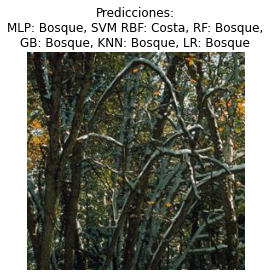

Procesando imagen: forest_cdmc344.jpg


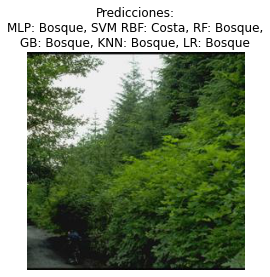

Procesando imagen: forest_cdmc348.jpg


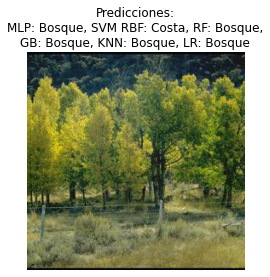

Procesando imagen: forest_land102.jpg


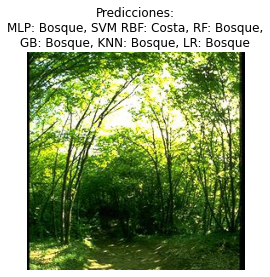

Procesando imagen: forest_land222.jpg


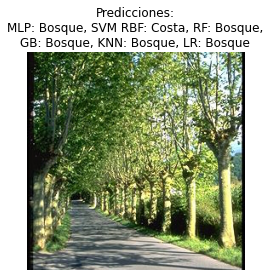

Procesando imagen: highway_bost166.jpg


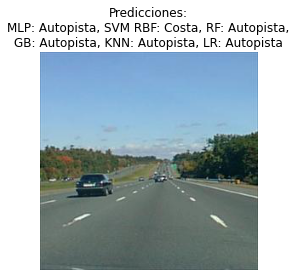

Procesando imagen: highway_bost177.jpg


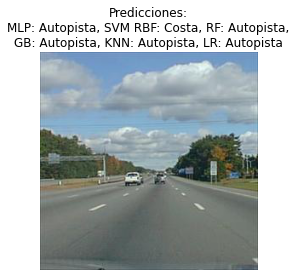

Procesando imagen: highway_bost290.jpg


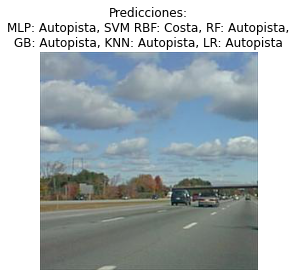

Procesando imagen: highway_bost295.jpg


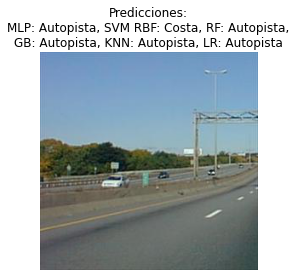

Procesando imagen: highway_gre644.jpg


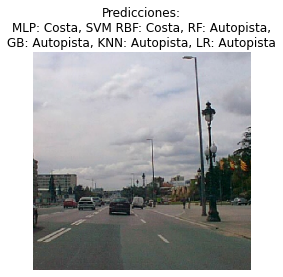

In [24]:
# Definir función para obtener las etiquetas en español
def obtener_label(prediccion):
    if prediccion == 0:
        return "Costa"
    elif prediccion == 1:
        return "Bosque"
    elif prediccion == 2:
        return "Autopista"

# Ruta de la carpeta de imágenes
ruta_imagenes = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica2\Parte_6\Costas,Forest and Higway\Prueba'

# Iterar sobre cada imagen en la carpeta
for archivo_imagen in os.listdir(ruta_imagenes):
    if archivo_imagen.endswith('.jpg'):  # Verificar que sea una imagen JPG
        ruta_completa = os.path.join(ruta_imagenes, archivo_imagen)
        
        # Leer la imagen
        image_test = cv.imread(ruta_completa)
        image_test_rgb = cv.cvtColor(image_test, cv.COLOR_BGR2RGB)  # Convertir a RGB para plt
        print(f"Procesando imagen: {archivo_imagen}")
        
        # Separar los canales de color
        B, G, R = cv.split(image_test)
        features = []
        
        # Extraer características: media y desviación estándar de cada canal
        image_features = [np.mean(R), np.mean(G), np.mean(B), np.std(R), np.std(G), np.std(B)]
        features.append(image_features)

        # Predicciones con cada modelo
        image_test_mlp = mlp.predict(features)
        pred_mlp = obtener_label(image_test_mlp[0])

        image_test_rbf = best_svm.predict(features)
        pred_rbf = obtener_label(image_test_rbf[0])

        image_test_random_forest = rf.predict(features)
        pred_rf = obtener_label(image_test_random_forest[0])

        image_test_gb = gb.predict(features)
        pred_gb = obtener_label(image_test_gb[0])

        image_test_knn = knn.predict(features)
        pred_knn = obtener_label(image_test_knn[0])

        image_test_lr = lr.predict(features)
        pred_lr = obtener_label(image_test_lr[0])

        # Mostrar la imagen con las predicciones de cada modelo
        plt.imshow(image_test_rgb)
        plt.title(f"Predicciones:\nMLP: {pred_mlp}, SVM RBF: {pred_rbf}, RF: {pred_rf},\nGB: {pred_gb}, KNN: {pred_knn}, LR: {pred_lr}")
        plt.axis('off')  # Ocultar los ejes
        plt.show()

# Análisis de Modelos: Regresión Logística, K-Nearest Neighbors, Gradient Boosting, SVM con RBF, Random Forest y MLP Classifier

En esta sección se presenta una comparación entre varios modelos de clasificación: **Regresión Logística**, **K-Nearest Neighbors (KNN)**, **Gradient Boosting**, **SVM con Kernel RBF**, **Random Forest** y **MLP Classifier**. Los modelos fueron evaluados utilizando las métricas: **Precisión**, **Recall (Sensibilidad)**, **F1-score** y **Exactitud (Accuracy)**.

## Resultados de los Modelos

### 1. MLP Classifier (Redes Neuronales)
- **Exactitud (Accuracy):** 80.21%
- **F1 Score:** 0.797
- **Recall:** 80.21%
- **Precisión:** 80.67%

### 2. SVM con Kernel RBF
- **Mejores Hiperparámetros Encontrados:**
  - **C:** 33.52
  - **Gamma:** 0.0376
- **Exactitud (Accuracy):** 82.29%
- **F1 Score:** 0.823
- **Recall:** 82.29%
- **Precisión:** 82.66%

### 3. Random Forest
- **Exactitud (Accuracy):** 80.90%
- **F1 Score:** 0.808
- **Recall:** 80.90%
- **Precisión:** 81.60%

### 4. Gradient Boosting
- **Exactitud (Accuracy):** 82.64%
- **F1 Score:** 0.825
- **Recall:** 82.64%
- **Precisión:** 82.71%

### 5. K-Nearest Neighbors (KNN)
- **Exactitud (Accuracy):** 77.78%
- **F1 Score:** 0.776
- **Recall:** 77.78%
- **Precisión:** 78.23%

### 6. Regresión Logística
- **Exactitud (Accuracy):** 77.43%
- **F1 Score:** 0.773
- **Recall:** 77.43%
- **Precisión:** 77.36%

## Comparación de Resultados

### Precisión
- **Gradient Boosting:** 82.71%
- **SVM con Kernel RBF:** 82.66%
- **Random Forest:** 81.60%
- **MLP Classifier:** 80.67%
- **K-Nearest Neighbors (KNN):** 78.23%
- **Regresión Logística:** 77.36%

**Gradient Boosting** lidera en términos de precisión, lo que indica que tiene el menor número de falsos positivos en comparación con los demás modelos. **SVM con Kernel RBF** y **Random Forest** también obtienen resultados competitivos en esta métrica.

### Recall (Sensibilidad)
- **Gradient Boosting:** 82.64%
- **SVM con Kernel RBF:** 82.29%
- **Random Forest:** 80.90%
- **MLP Classifier:** 80.21%
- **K-Nearest Neighbors (KNN):** 77.78%
- **Regresión Logística:** 77.43%

**Gradient Boosting** presenta el mayor recall, identificando un mayor porcentaje de casos positivos que los otros modelos. **SVM con Kernel RBF** y **Random Forest** siguen de cerca, con valores muy cercanos.

### F1-score
- **Gradient Boosting:** 0.825
- **SVM con Kernel RBF:** 0.823
- **Random Forest:** 0.808
- **MLP Classifier:** 0.797
- **K-Nearest Neighbors (KNN):** 0.776
- **Regresión Logística:** 0.773

El **F1-score** de **Gradient Boosting** es el más alto, lo que refleja un buen equilibrio entre precisión y recall. **SVM con Kernel RBF** y **Random Forest** también muestran un buen equilibrio, con valores cercanos a los de **Gradient Boosting**.

### Exactitud (Accuracy)
- **Gradient Boosting:** 82.64%
- **SVM con Kernel RBF:** 82.29%
- **Random Forest:** 80.90%
- **MLP Classifier:** 80.21%
- **K-Nearest Neighbors (KNN):** 77.78%
- **Regresión Logística:** 77.43%

**Gradient Boosting** y **SVM con Kernel RBF** presentan las mayores exactitudes, clasificando correctamente una mayor proporción de instancias en comparación con los otros modelos. **Random Forest** y **MLP Classifier** también alcanzan buenos resultados, pero no superan a los dos primeros.

## Conclusión

En este análisis, **Gradient Boosting** sobresale como el modelo más robusto, mostrando un mejor rendimiento en todas las métricas. **SVM con Kernel RBF** sigue muy de cerca en cuanto a rendimiento, siendo una opción también fuerte. **Random Forest** es una opción competitiva en términos de precisión y recall, mientras que **MLP Classifier**, **K-Nearest Neighbors (KNN)** y **Regresión Logística** tienen un rendimiento menor en comparación con los otros modelos. La elección del mejor modelo puede depender de otros factores como la complejidad y el tiempo de entrenamiento, pero en términos de rendimiento, **Gradient Boosting** es la opción más efectiva.
